In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic3.csv")

In [11]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# Check unique values in data set

In [15]:
df['embarked'].unique()     

array(['S', 'C', nan, 'Q'], dtype=object)

# Check Null values in the dataset

In [13]:
df.isnull().sum()     

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# Handle null values

In [11]:
df['age'] = df['age'].fillna(df['age'].mean())

In [12]:
df['fare'] = df['fare'].fillna(df['fare'].mean())

In [13]:
df['embarked'].mode()

0    S
dtype: object

In [14]:
df['embarked'] = df['embarked'].fillna('S')

In [47]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738879,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# How many people survived and How many Died

In [18]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

809 people died and 500 peple survived in this shipwreck

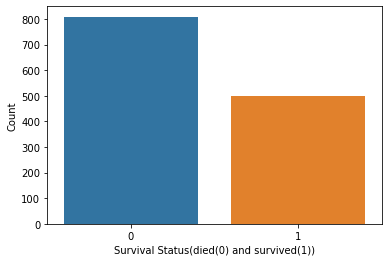

In [20]:
sns.countplot(x = 'survived',data = df)
plt.xlabel('Survival Status(died(0) and survived(1))')
plt.ylabel('Count')

plt.show();

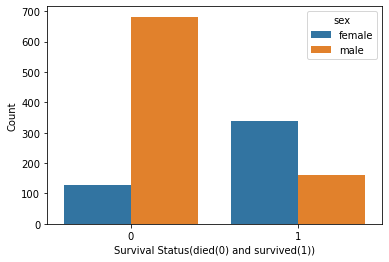

In [21]:
sns.countplot(x = 'survived',data = df,hue='sex')
plt.xlabel('Survival Status(died(0) and survived(1))')
plt.ylabel('Count')

plt.show();

Women are survived more than that of Men in this shipwreck 

In [22]:
survived_male_count = df[df['survived'] == 1]['sex'].value_counts()['male']

print("Number of male passengers who survived:", survived_male_count)

Number of male passengers who survived: 161


In [23]:
survived_female_count = df[df['survived'] == 1]['sex'].value_counts()['female']

print("Number of female passengers who survived:", survived_female_count)

Number of female passengers who survived: 339


In [24]:
died_male_count=df[df['survived'] == 0]['sex'].value_counts()['male']
print("Number of male passengers who died:", died_male_count)

Number of male passengers who died: 682


In [25]:
died_female_count=df[df['survived'] == 0]['sex'].value_counts()['female']
print("Number of female passengers who died:", died_female_count)

Number of female passengers who died: 127


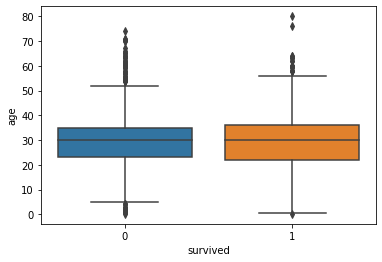

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='age', data=df);

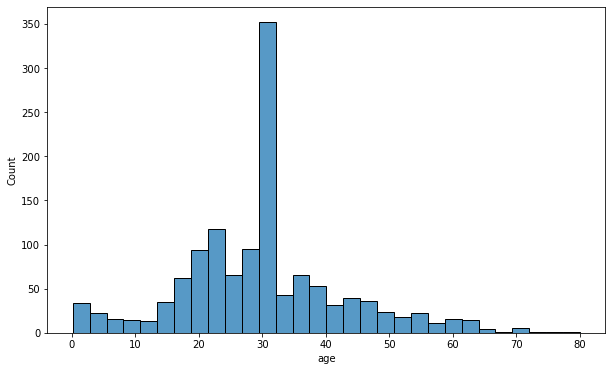

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", bins=30);

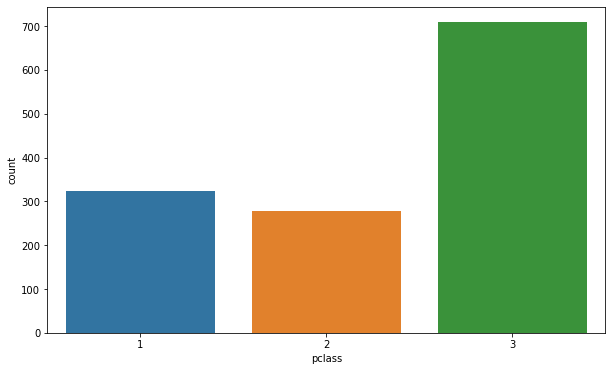

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'pclass',data = df);


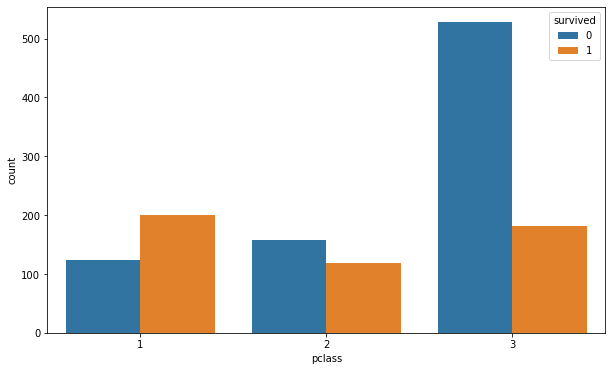

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'pclass',data = df,hue='survived');


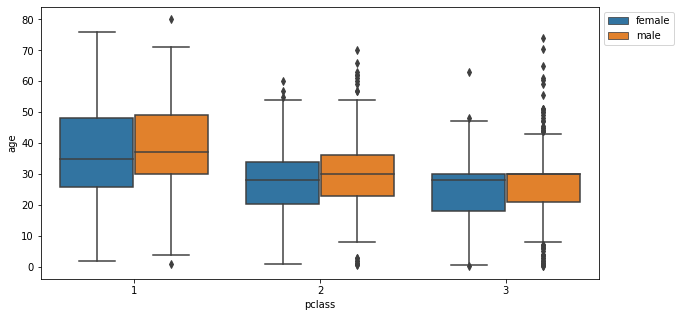

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='age', x='pclass', hue='sex')
plt.legend(bbox_to_anchor=(1.0, 1));


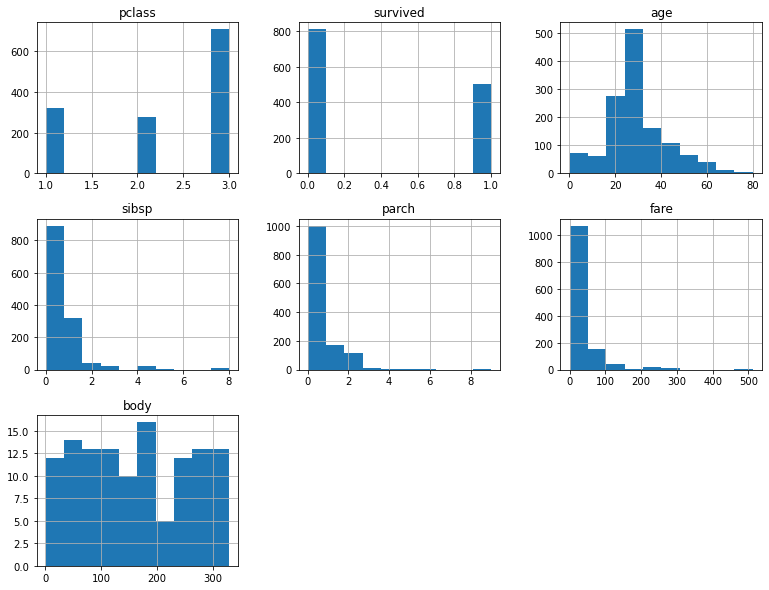

In [29]:
df.hist(figsize=(13,10))
plt.show()

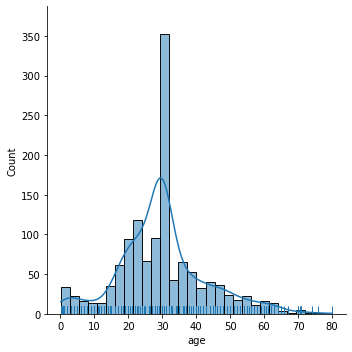

In [37]:
sns.displot(x = 'age', data = df, bins = 30, rug = True, kde = True);

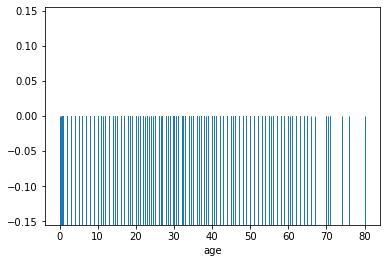

In [38]:
sns.rugplot(x = 'age', data = df, height = 0.5);


# Number of female and male passengers

In [31]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

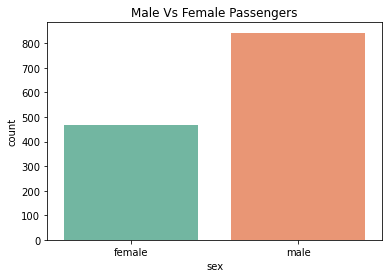

In [30]:
sns.countplot(x='sex',data = df,palette ='Set2')
plt.title("Male Vs Female Passengers")
plt.show();

# Correlation matrix

In [33]:
df_removed=df.drop(columns='body')
corr=df_removed.corr()
corr

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244208
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171521
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.171521,0.160224,0.221522,1.000000


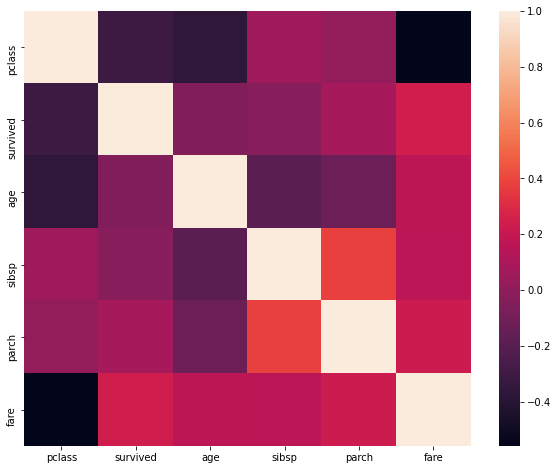

In [35]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr);

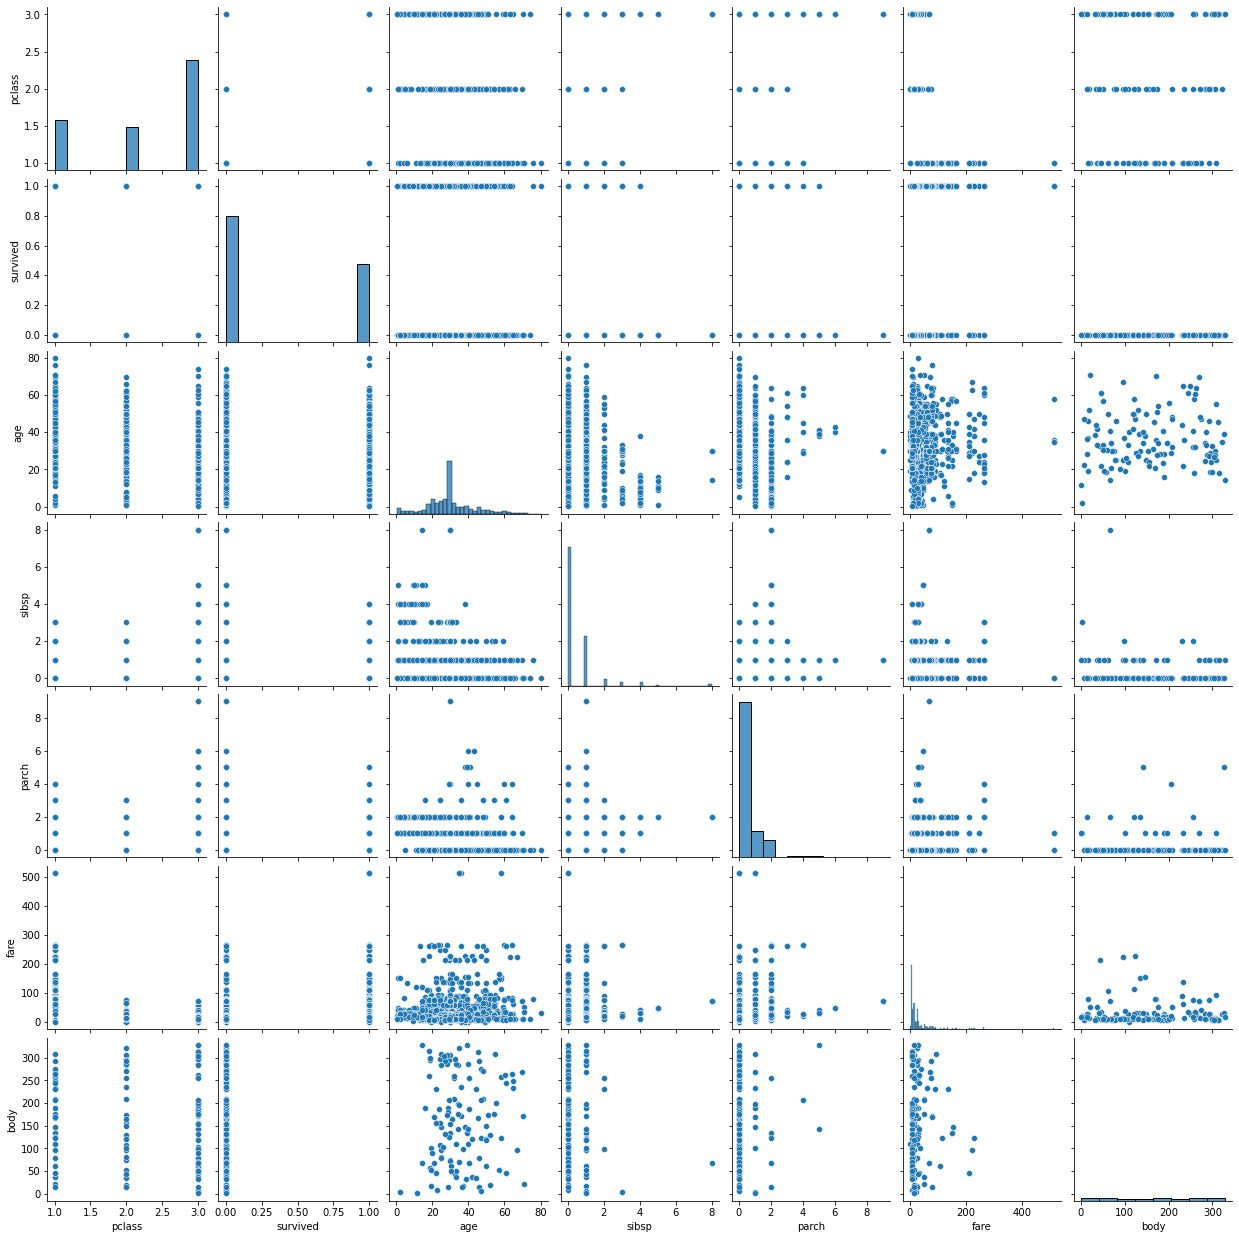

In [39]:
sns.pairplot(data=df);

# pie chart showing male and female survived and died

In [42]:
male_survived = df[(df['sex'] == 'male') & (df['survived'] == 1)].shape[0]
male_died = df[(df['sex'] == 'male') & (df['survived'] == 0)].shape[0]

female_survived = df[(df['sex'] == 'female') & (df['survived'] == 1)].shape[0]
female_died = df[(df['sex'] == 'female') & (df['survived'] == 0)].shape[0]


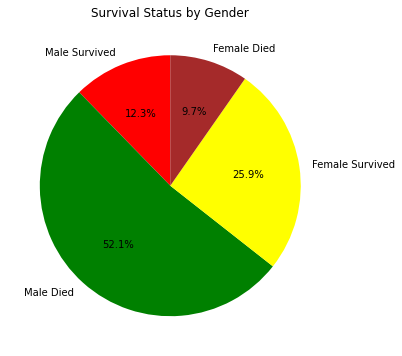

In [46]:
sizes = [male_survived,male_died,female_survived,female_died]
colors=['red','green','yellow','brown']
labels = ['Male Survived', 'Male Died', 'Female Survived', 'Female Died']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('Survival Status by Gender')

plt.show();

# Dropping the columns

In [16]:
df=df.drop(['name','cabin','ticket','home.dest','boat','body'],axis=1)

In [17]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


# Replace the value of female to1 and male to 0

In [23]:
df['sex'] = df['sex'].replace({'female': 1, 'male': 0})

In [24]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,S
1,1,1,0,0.9167,1,2,151.5500,S
2,1,0,1,2.0000,1,2,151.5500,S
3,1,0,0,30.0000,1,2,151.5500,S
4,1,0,1,25.0000,1,2,151.5500,S


# create dummy variable for pclass, embarked

In [28]:
dummy_columns = ['embarked','pclass']

In [29]:
df_dummies = pd.get_dummies(df, columns=dummy_columns)

In [32]:
df_dummies.head()

,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,1,29.0000,0,0,211.3375,0,0,1,1,0,0
1,1,0,0.9167,1,2,151.5500,0,0,1,1,0,0
2,0,1,2.0000,1,2,151.5500,0,0,1,1,0,0
3,0,0,30.0000,1,2,151.5500,0,0,1,1,0,0
4,0,1,25.0000,1,2,151.5500,0,0,1,1,0,0


In [33]:
X = df_dummies.drop('survived', axis=1)
X

,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,29.000000,0,0,211.3375,0,0,1,1,0,0
1,0,0.916700,1,2,151.5500,0,0,1,1,0,0
2,1,2.000000,1,2,151.5500,0,0,1,1,0,0
3,0,30.000000,1,2,151.5500,0,0,1,1,0,0
4,1,25.000000,1,2,151.5500,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,1,14.500000,1,0,14.4542,1,0,0,0,0,1
1305,1,29.881135,1,0,14.4542,1,0,0,0,0,1
1306,0,26.500000,0,0,7.2250,1,0,0,0,0,1
1307,0,27.000000,0,0,7.2250,1,0,0,0,0,1


In [35]:
y =df_dummies['survived']
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

# Splitting the Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=103)

# Instantiating the LogisticRegression model

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
classifier = LogisticRegression()

In [237]:
classifier.fit(X_train, y_train)

LogisticRegression()

# Predicting the Results

In [238]:
predicted_results = classifier.predict(X_test)
predicted_results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

# Evaluating the Model Performance

In [239]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [240]:
cm = confusion_matrix(y_test, predicted_results)
cm

array([[135,  16],
       [ 31,  80]], dtype=int64)

<AxesSubplot:>

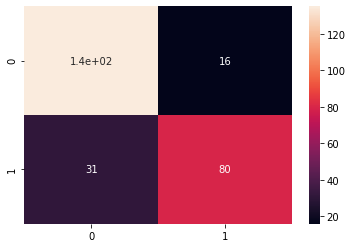

In [241]:
sns.heatmap(cm, annot=True)

In [242]:
print(classification_report(y_test, predicted_results))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       151
           1       0.83      0.72      0.77       111

    accuracy                           0.82       262
   macro avg       0.82      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



In [243]:
print(accuracy_score(y_test, predicted_results))

0.8206106870229007
